# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3  AC 209 : From MLE to AIC


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from scipy.optimize import minimize

from statsmodels.api import OLS
import statsmodels.api as sm
from scipy.stats import norm
%matplotlib inline


/home/marios/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools



<div class='exercise'> <b>  Question 7: Student's t MLE </b> </div>

**7.1** Fit a simple linear regression model using Maximum Likelihood Estimation on the data provided in `data/beerdata.csv`.  Consider two statistical models the for noise: a) Normal and b) Student's $\textit{t}$-distribution with $\nu=5$ and scale factor $\sigma=\sqrt{3/5}$.  

**7.2** Compare the two models performances (visualize the prediction lines and estimate the KL divergence between the data and each model) and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal.

**Hints:**
1. Use the probability density function for the Student's t distribution  with location $t$,  $\nu$ degrees of freedom and scale factor $\sigma$.
2. If the MLE regression coefficients cannot be derived analytically consider numerical methods.
3. For _convenience_, you can use sklearn or statsmodel for the Normal case.


### Answers

**7.1 Fit a simple linear regression model using Maximum Likelihood Estimation on the data provided in `data/beerdata.csv`.  Consider two statistical models the for noise: a) Normal and b) Student's $\textit{t}$-distribution with $\nu=5$ and scale factor $\sigma=\sqrt{3/5}$.   **

*your answer here*

The density for the Student's $\textit{t}$-distribution is given by 

$$ p(t| \sigma, \nu) = \frac{\frac{\Gamma(\nu +1)}{2}}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu\sigma^2}}\left(1 + \frac{1}{\nu}\frac{t^2}{\sigma^2}\right)^{-\frac{\nu + 1}{2}}.$$

For a linear regression assuming noise is independent and identically distributed as Student's $\textit{t}$-distribution, we get the likelihood:

$$\begin{aligned}
    p(\epsilon) &= \prod_i p(\epsilon_i)\\
                &= \prod_i p(y_i - \beta_1x_i - \beta_0)\\
                &= \prod_i \frac{\frac{\Gamma(\nu +1)}{2}}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu\sigma^2}}\left(1 + \frac{1}{\nu}\frac{(y_i - \beta_1x_i - \beta_0)^2}{\sigma^2}\right)^{-\frac{\nu + 1}{2}}.
 \end{aligned}$$
 
As usual, we want to maximize the likelihood with respect to $\beta$. It is easier to work with the log-likelihood:

$$ \ell(\nu,\sigma, \beta) = C(\nu, \sigma) -\frac{\nu + 1}{2}\sum_i \log\left(1 + \frac{1}{\nu}\frac{(y_i - \beta_1x_i - \beta_0)^2}{\sigma^2}\right)$$

where $C(\nu,\sigma)$ has no dependance on $\beta$ and then does play any role in the maximization. Thus, maximizing $\ell(\beta)$ is the same as minimizing the loss function:

$$\Omega(\beta)=\frac{\nu + 1}{2}\sum_i \log\left(1 + \frac{1}{\nu}\frac{(y_i - \beta_1x_i - \beta_0)^2}{\sigma^2}\right)$$

Unlike the ordinary least squares regression model, we cannot write an analytical closed solution for the above model. Nevertheless  we can use numerical minimization methods.

In [3]:
#Read and show the data
# your code here

beer_df = pd.read_csv('./data/beerdata.csv')
x  = beer_df.x.values
y  = beer_df.y.values

beer_df.describe()

,Unnamed: 0,x,y
count,30.000000,30.000000,30.000000
mean,14.500000,0.440177,7.627199
std,8.803408,0.298491,2.354461
min,0.000000,0.006531,3.783621
25%,7.250000,0.210233,5.761739
50%,14.500000,0.432952,7.509764
75%,21.750000,0.693451,8.540923
max,29.000000,0.986603,15.175301


Text(0,0.5,'y')

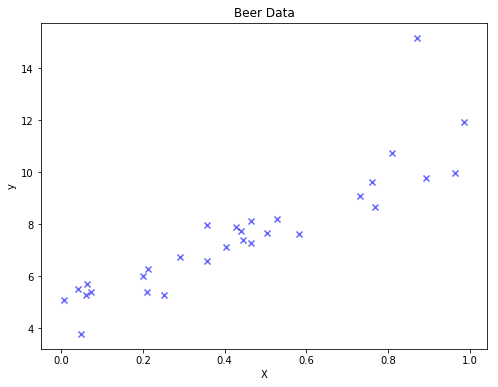

In [4]:
#### Plot the data
# your code here
fig=plt.figure(figsize=(8,6))

plt.scatter(x,y,color='b',marker='x', alpha=0.6)

plt.title('Beer Data')
plt.xlabel('X')
plt.ylabel('y')

In [5]:
#### Generate the ordinary least squares model (OLS)
# your code here
X = sm.add_constant(beer_df['x'])
y = beer_df['y']

beer_ols_model = OLS(y,X).fit()

beer_summary_ols = beer_ols_model.summary()
print(beer_summary_ols)

ols_line_x = np.linspace(0,1,len(y))
# The OLS fit line
ols_line_y = beer_ols_model.params[1]*ols_line_x+beer_ols_model.params[0]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     108.7
Date:                Fri, 05 Oct 2018   Prob (F-statistic):           3.78e-11
Time:                        20:31:20   Log-Likelihood:                -43.960
No. Observations:                  30   AIC:                             91.92
Df Residuals:                      28   BIC:                             94.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5309      0.357     12.697      0.0

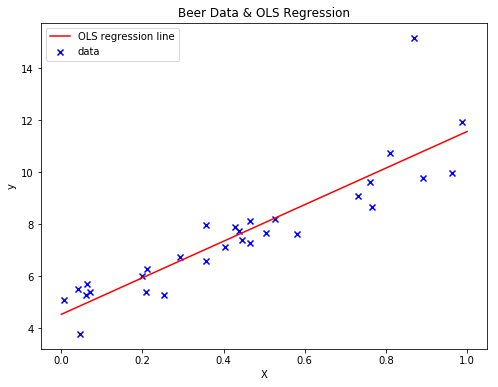

In [6]:
#### Plot the data along with OLS fit line
# your code here
fig=plt.figure(figsize=(8,6))
plt.scatter(x,y,color='b',marker='x',label='data')
## OR BY USING
#sns.lmplot('x','y',data=beer_df,fit_reg=True ,markers='x')

## Plot the OLS Regression line
plt.plot(ols_line_x, ols_line_y,color='red',label='OLS regression line')
plt.title('Beer Data & OLS Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='best')


In [7]:
#### LET'S MAKE THE REGRESSION MODEL WITH t-Students distribution
# your code here

# Define a function for the loss function
def student_loss(beta, df_x, df_y, degrees=5, scale=np.sqrt(3/5)):
    errors= df_y-np.dot(df_x, beta)
    
    ## for convenience purposes just use -np.log(student's t-distribution pdf)
    return(np.sum(-np.log(t.pdf(errors, degrees,scale=scale))))

In [8]:
# your code here

# lambda function to conveniently represent loss function
loss = lambda x : student_loss(x, df_x=X,df_y=y)

# Use nelder-mead minimization with ols model starting parameters to generate optimal betas
optimal_betas = minimize(loss, beer_ols_model.params, tol=1e-6)

# let's generate y coordinates for our regression line
student_line_y = optimal_betas.x[0] + ols_line_x*optimal_betas.x[1]

print('beta_0=',optimal_betas.x[0], 'beta_1=', optimal_betas.x[1])

beta_0= 4.773823570121836 beta_1= 6.172940618058738


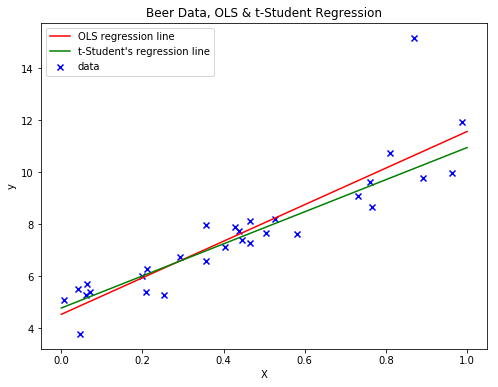

In [9]:
# your code here
# Basic visualization

fig=plt.figure(figsize=(8,6))
plt.scatter(x,y,color='b',marker='x',label='data')
## OR BY USING
# sns.lmplot('x','y',  data=beer_df, fit_reg=False)


# Plot Regression Lines (OLS & t-Students)
plt.plot(ols_line_x, ols_line_y, color='red', label='OLS regression line')
plt.plot(ols_line_x, student_line_y, '-g', label='t-Student\'s regression line')

# Set title
plt.title('Beer Data, OLS & t-Student Regression')
# Set axis labels
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

**7.2 Compare the two models performances (visualize the prediction lines and estimate the KL divergence between the data and each model) and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal. **


*your answer here*

The two models are very similar and give quite similar regression lines which is not surprising.  The $\textit{t}$-Student's is very similar to a normal except it has "fatter tails" which should in principle make it more robust to outliers. In the scatter plot we notice that the beer data set has an outlier point  on the right-up corner. The $\textit{t}$-Student regression model is less affected than the OLS by the outlier point and hence, by visual inspection the $\textit{t}$-Student's distribution fits better to the our data. 

We can quantify and be sure about which model fits betters our data by calculating the KL-Divergence for the two models.


In [10]:
# your code here

# Calculate the likelihoods
L_normal = np.prod(norm.pdf(y, ols_line_y, 1))
L_student = np.prod(t.pdf(y, student_line_y, 5,np.sqrt(3/5)))
## The KL divergence is:
D = 1/len(y) * np.log(L_student/L_normal)
print('The difference between KL divergence of Normal and t-Students model is: ',D)

#### Alternatevely and numerically more stable by using the log-likelihoods:
ell_normal = np.sum(norm.logpdf(y, ols_line_y, 1))
ell_student = np.sum(t.logpdf(y, student_line_y, 5,np.sqrt(3/5)))
D_log = 1/len(y) * (ell_student- ell_normal)
print('The difference between KL divergence of Normal and t-Students model is: ',D_log)


The difference between KL divergence of Normal and t-Students model is:  3.3546059477156316
The difference between KL divergence of Normal and t-Students model is:  3.354605947715632


*your answer here*

As we predicted by visual inspection, the $\textit{t}$-Student regression model is being better than OLS.


<div class='exercise'> <b>  Question 8: Akaike Information Criterion (AIC) </b> </div>

Perform a simple numerical experiment to understand and demonstrate the AIC by using the given `generate_data` function to generate your data.
 

**8.1**
Generate data for different number of parameters $k$, in the range 1 to 10. For each of the ten models generate 1000 training and 1000 testing datasets with each one containing $n=50$ observations.

**8.2** 
Use the training set to estimate the OLS coefficients and  calculate the predicted values, $\hat y_{tr}$, on the training set and the log-likelihood. 
 Use the OLS coefficients to calculate the predicted values  for the testing set, $\hat y_{te}$, and the associated log-likelihood. 

**8.3** 
For each $k$ compute the average and standard deviation of the log-likelihoods across the 1000 simulations.  Plot the average  log-likelihoods (with error bars) and the average AIC as function of $k$, the number of parameters. What is the best $k$ based on AIC?

**8.4**
Verify the results in 8.3 by plotting the average log-likelihoods for each of the training and testing datasets as a function of $k$. What is the best $k$ based on this plot?


**Comment:**
1. The function "generate_data" uses an interesting trick to generate data directly using the regression coefficients as proxies for the correlations with the response variable. It generates data from a Normal distribution, hence $y_i \sim \mathcal{N}(\mu_i= 0.15 x_{1,i} - 0.4 x_{2,i},\sigma^2=1)$.

In [11]:
def generate_data(N,k,beta=[0.15 , -0.4]):
    
    ## N: The number of observations
    ## k: The number of parameters
    ## beta is the weights vector for the covariates x1, x2
    ##
    ## Make d_min be greater or equal to k
    n_dim = 1+len(beta)
    if (n_dim <= k):
        n_dim = k

    Rho = np.eye(n_dim)
    
    # Add beta in the first row or Rho
    for i,r in enumerate(beta):
        Rho[0,i+1] = r
    
    index_lower = np.tril_indices(n_dim, -1)
    
    Rho[index_lower] = Rho.T[index_lower]
    mean = n_dim * [0.]        
    Xtrain = np.random.multivariate_normal(mean, Rho, size=N)
    Xtest = np.random.multivariate_normal(mean, Rho, size=N)
    ytrain = Xtrain[:,0].copy()
    Xtrain[:,0]=1.
    ytest = Xtest[:,0].copy()
    Xtest[:,0]=1.
    return Xtrain[:,:k], ytrain, Xtest[:,:k], ytest

### Answers

**8.1 Generate data for different number of parameters $k$, in the range 1 to 10. For each of the ten models generate 1000 training and 1000 testing datasets with each one containing $n=50$ observations. **


In [12]:
#### Be familiar with the generated data by printing them:
# your code here
# generate_data(20,1)
# generate_data(20,2)
# generate_data(20,3)

In [13]:
#### Generate the datasets:
# your code here

reps=1000
kMax=10
n=50


Xtr_all = []
ytr_all = []
Xte_all = []
yte_all = []

## This loop is generating data for k=10 different models
for k in range(1,kMax+1):
    
    Xtr_r = []
    ytr_r = []
    Xte_r = []
    yte_r = []

    ## This loop is generating reps=1000 set data for each model k 
    for r in range(reps):
        Xtr, ytr, Xte, yte = generate_data(n, k)
 
        Xtr_r.append(Xtr)
        ytr_r.append(ytr)
        Xte_r.append(Xte)
        yte_r.append(yte)
      
    Xtr_all.append(Xtr_r)
    ytr_all.append(ytr_r)
    Xte_all.append(Xte_r)
    yte_all.append(yte_r)
    
    

**8.2 Use the training set to estimate the OLS coefficients and  calculate the predicted values, $\hat y_{tr}$, on the training set and the log-likelihood. 
 Use the OLS coefficients to calculate the predicted values  for the testing set, $\hat y_{te}$, and the associated log-likelihood. **


In [14]:
#### Fit the models and calculate the log-likelihoods
# your code here

mean_tr=np.zeros(kMax)
std_tr=np.zeros(kMax)
mean_te=np.zeros(kMax)
std_te=np.zeros(kMax)


for k in range(0,kMax):
    
    tr_ell=np.zeros(reps)
    te_ell=np.zeros(reps)
    
    
    for r in range(reps):
        
        ols = sm.OLS(ytr_all[k][r],Xtr_all[k][r]).fit()
        yhat_tr = np.dot(Xtr_all[k][r], ols.params)
        ell_train = np.sum(norm.logpdf(ytr_all[k][r], yhat_tr, 1))
        
        yhat_te = np.dot(Xte_all[k][r], ols.params)
    
        ell_test = np.sum(norm.logpdf(yte_all[k][r], yhat_te, 1))
    
        tr_ell[r] = ell_train
        te_ell[r] = ell_test
        
    mean_tr[k] = np.mean(tr_ell)
    std_tr[k] = np.std(tr_ell)
    mean_te[k] = np.mean(te_ell)
    std_te[k] = np.std(te_ell)
    

**8.3
For each $k$ compute the average and standard deviation of the log-likelihoods across the 1000 simulations.  Plot the average  log-likelihoods (with error bars) and the average AIC (with error bars) as function of $k$, the number of parameters. What is the best $k$ based on AIC?**

/home/marios/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


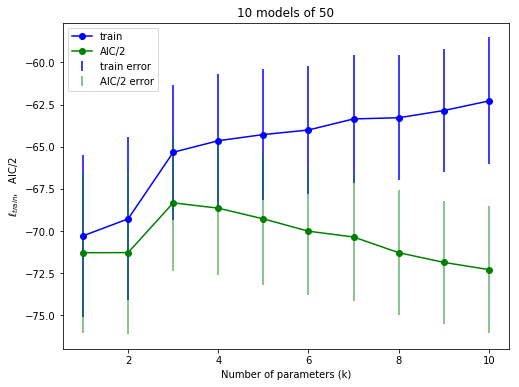

In [15]:
#### Plot the log-likelihood for the traing and the AIC:
# your code here
fig=plt.figure(figsize=(8,6))

## Define a vector that contains k
k_vec = np.linspace(1,kMax,kMax)


# Define AIC according to the notes
myAIC = 2*mean_tr - 2*k_vec

##  We plot the AIC/2 because it is more convenience to be compared with the log-likelihood 
plt.plot(k_vec, mean_tr, '-o', color = 'blue',label='train')
plt.errorbar(k_vec, mean_tr, yerr=std_tr, fmt=None, color='blue',label='train error')
plt.plot(k_vec, myAIC/2 , '-o', color = 'green',label='AIC/2')
plt.errorbar(k_vec, myAIC/2, yerr=std_tr, fmt=None, color='green', alpha=0.6, label='AIC/2 error')


plt.xlabel("Number of parameters (k)")
plt.ylabel("$\ell_{train}$,   AIC/2")
plt.title(str(kMax)+' models of '+str(n))
plt.legend(loc='upper left')




*your answer here*

AIC becomes maximum for $k=3$, hence $k=3$ gives the best model.

Note that statsmodels uses the AIC as it is defined in the original paper of Akaike as: AIC$=2k-2\ell$, where the best model is given by the $k$ that  minimzes the AIC. In our notes we give the formula AIC$=2\ell-2k$, where the best model is given by the $k$ that maximizes the AIC. The two AIC definitions are equivalent. Just for consistency, here we follow the formula that is given in our notes.


**8.4
Verify the results in 8.3 by plotting the average log-likelihoods for each of the training and testing datasets as a function of $k$. What is the best $k$ based on this plot?
**


/home/marios/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


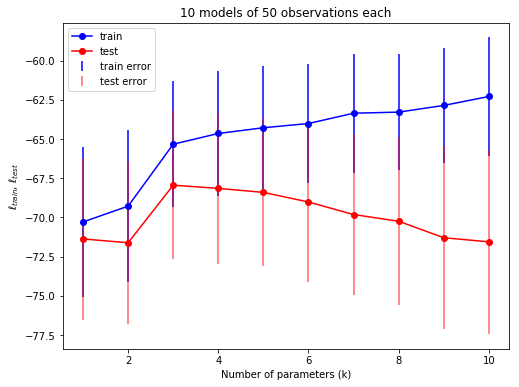

In [16]:
#### Plot the log-likelihood for the traing and testing:
# your code here
plt.figure(figsize=(8,6))

plt.plot(k_vec, mean_tr, '-o', color = 'blue',label='train')
plt.errorbar(k_vec, mean_tr, yerr=std_tr, fmt=None, color='blue',label='train error')
plt.plot(k_vec, mean_te, '-o', color = 'red',label='test')
plt.errorbar(k_vec, mean_te,   yerr=std_te, fmt=None, color='red',alpha=0.6, label='test error')




plt.xlabel("Number of parameters (k)")
plt.ylabel("$\ell_{train}$, $\ell_{test}$")
plt.title(str(kMax)+' models of '+str(n)+' observations each');
plt.legend(loc='upper left')



*your answer here*

We verify that the best model is given by using $k=3$ parameters.